In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
a=pd.read_excel(r"C:\\Users\Ogeid99\Desktop\cataloguess\lat_long_declust_magn_greaterthan3.xlsx",sep='|',header=None)
a.rename(columns={1:'Latitude',0:'Longitude', 4:'Depth/Km', 3:'Magnitude', 5:'MagType', 2:'Time'}, inplace=True)
a

,Longitude,Latitude,Time,Magnitude,Depth/Km,MagType
0,717400000000000,461580000000000,'1985-01-04T16:57:40.240000',380000000000000,1.000000e+01,'M'
1,664100000000000,453380000000000,'1985-01-04T23:59:54.820000',370000000000000,5.000000e+00,'M'
2,662700000000000,454090000000000,'1985-01-05T03:47:03.640000',320000000000000,1.000000e+01,'M'
3,167650000000000,392910000000000,'1985-01-06T17:22:58.540000',3,5.000000e+00,'Md'
4,127300000000000,432250000000000,'1985-01-07T00:34:49.290000',3,1.000000e+01,'Md'
...,...,...,...,...,...,...
7717,146098000000000,377413000000000,'2020-04-25T00:40:02.630000',320000000000000,2.600000e+01,'ML'
7718,146175000000000,377523000000000,'2020-04-25T07:21:54.480000',340000000000000,2.350000e+14,'ML'
7719,141516700000000,408285000000000,'2020-04-26T02:59:02.450000',310000000000000,2.500000e+14,'Md'
7720,136060000000000,384052000000000,'2020-04-28T05:57:28.820000',310000000000000,2.540000e+14,'ML'


In [2]:
#data cleaning
from datetime import datetime
time_plot=a['Time']
function=lambda x: x.replace("'","") #replace "'" with ' '
datetime_object = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
split_object=lambda i: i.replace("T"," ") #for i in time_plot
time_plot=time_plot.map(function)
time_plot=time_plot.map(split_object)
time_plot=time_plot.map(datetime_object)
#time_plot=time_plot.to_datetime() #.astype(np.datetime64) 
a['Time']=time_plot
list_magn=[]
mag=a['Magnitude']
long=a['Longitude']
list_long=[]
Lat=a['Latitude']
Lat=[i/10000000000000 for i in Lat]
for j in mag:
    if j >20:
        j=j/100000000000000
        list_magn.append(j)
    else:
        j=float(str(j))
        list_magn.append(j)
for k in long:
    k=k/10000000000000
    if k <40.0:
        list_long.append(k)
    else:
        k=k/10
        list_long.append(k)
a['Magnitude']=list_magn
a['Longitude']=list_long
a['Latitude']=Lat
a

,Longitude,Latitude,Time,Magnitude,Depth/Km,MagType
0,7.17400,46.1580,1985-01-04 16:57:40.240,3.8,1.000000e+01,'M'
1,6.64100,45.3380,1985-01-04 23:59:54.820,3.7,5.000000e+00,'M'
2,6.62700,45.4090,1985-01-05 03:47:03.640,3.2,1.000000e+01,'M'
3,16.76500,39.2910,1985-01-06 17:22:58.540,3.0,5.000000e+00,'Md'
4,12.73000,43.2250,1985-01-07 00:34:49.290,3.0,1.000000e+01,'Md'
...,...,...,...,...,...,...
7717,14.60980,37.7413,2020-04-25 00:40:02.630,3.2,2.600000e+01,'ML'
7718,14.61750,37.7523,2020-04-25 07:21:54.480,3.4,2.350000e+14,'ML'
7719,14.15167,40.8285,2020-04-26 02:59:02.450,3.1,2.500000e+14,'Md'
7720,13.60600,38.4052,2020-04-28 05:57:28.820,3.1,2.540000e+14,'ML'


In [3]:
df=a
a['Time']

0      1985-01-04 16:57:40.240
1      1985-01-04 23:59:54.820
2      1985-01-05 03:47:03.640
3      1985-01-06 17:22:58.540
4      1985-01-07 00:34:49.290
                 ...          
7717   2020-04-25 00:40:02.630
7718   2020-04-25 07:21:54.480
7719   2020-04-26 02:59:02.450
7720   2020-04-28 05:57:28.820
7721   2020-04-28 07:14:45.750
Name: Time, Length: 7722, dtype: datetime64[ns]

In [5]:
import datetime
a=df[(df['Magnitude']>3.6)& (df['Time']>datetime.datetime(1985,1,1,1,1))& (df['Time']<datetime.datetime(2020,4,1,1,1))]

starting_time1=a['Time'].iloc[0]
end_time1=a['Time'].iloc[len(a.index)-1]
diff_time=int((((((end_time1-starting_time1).total_seconds())))-3600*24*365*10)/(3600*24*10))
events_interval=[]
diff_value=[]
for i in range(len(a.index)):
    diff=(a['Time'].iloc[i]-starting_time1).total_seconds()
    diff_value.append(diff)
a['Diff_time']=diff_value
cnt=0
while cnt <diff_time:  #890
    condition=a[(a['Diff_time']>=(864000*cnt))&(a['Diff_time']<(315360000+(864000*cnt)))].loc[:,'Diff_time']
    condition1=condition.to_list()
    events_interval.append(condition1)
    cnt+=1
number_time=pd.DataFrame(events_interval)
number_time_count=number_time.count(axis=1)
import random
nt=number_time_count.to_numpy()
chi=[]
p_val=[]
for i in range(1000):
    random.shuffle(nt)
    #nt_reshape=np.reshape(nt,(len(nt),1))
    nt_choice=[np.random.choice(nt) for u in range(31)]
    from statistics import mean 
    from scipy.stats import chisquare, chi2_contingency
    s=np.random.poisson(np.mean(nt),len(nt_choice))
    #chi2_contingency(number_time_count,s)
    test,d=chisquare(nt_choice,s)
    chi.append(test)
mean(chi)

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


145.7097244792959

In [5]:
df.to_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\DATA_reasenberg.csv",index=False)

DATA=df
DATA['Time'] = pd.to_datetime(DATA['Time'])

In [13]:
a_numpy=DATA.to_numpy()
slice_numpy=a_numpy[:,2].astype(np.datetime64)
list_array=[]
#whereis=np.where(slice_numpy=='Time') #search where is the cell called 'Time'
'''
n=0
for i in slice_numpy:
    n+=1
    if n>1:
        list_array.append(i)
list_array''' #to transform numpy array to list
m=0
lis_diff=[]
lis=[]
for i in slice_numpy:
    m+=1
    if m>0 and m < len(slice_numpy):  #the second condition is written to avoid the error due to exceedance of array lenght  
        diff=((slice_numpy[m]-slice_numpy[m-1])/1000000).astype(np.int32) #convert in int
        lis_diff.append(diff)            
        if np.floor_divide(diff,60*24)>0:       
            hours=np.floor_divide(diff,60*60)
            if hours<10: #to put zero
                hours='0'+str(hours)
            hou=np.mod(diff,60*60*24)
            minu=np.mod(hou,60*60)
            minutes=np.floor_divide(minu,60)
            if minutes<10:
                minutes='0'+str(minutes)
            seconds=np.mod(minu,60)
            if seconds<10: 
                seconds='0'+str(seconds)
        else: # np.floor_divide(diff,60)>0:
            minu=np.mod(diff,60*60)
            minutes=np.floor_divide(minu,60)
            if minutes<10:
                minutes='0'+str(minutes)
            seconds=np.mod(minu,60)
            if seconds<10:
                seconds='0'+str(seconds)
        real_time=f'{hours}:{minutes}.{seconds}' #look the previous caveat 
        lis.append(real_time) 
lis_series=pd.Series(lis)
print(lis_diff)

[25334, 13628, 135354, 25910, 37985, 131139, 13166, 145003, 90051, 76236, 59563, 537662, 37007, 102191, 20435, 122887, 12041, 31557, 220974, 781284, 246520, 54220, 18723, 30411, 137792, 219426, 77582, 150070, 134433, 60499, 209899, 13131, 14717, 122361, 41767, 71699, 73063, 138079, 152261, 65641, 71577, 94483, 227892, 4, 187164, 106340, 79764, 101389, 70701, 392533, 493282, 242440, 44567, 31154, 75891, 106631, 40892, 296061, 170254, 210003, 126501, 71746, 34104, 51320, 15561, 16097, 1007, 53524, 535006, 58903, 105441, 74538, 138947, 56440, 7063, 54413, 110368, 43602, 61911, 173110, 279370, 71606, 273455, 96334, 252740, 129641, 140821, 98452, 178688, 162516, 23625, 356983, 88207, 88562, 151, 36521, 77509, 29187, 83656, 207340, 265862, 63046, 72493, 386955, 97071, 1891, 697, 321449, 384, 29, 110969, 19646, 8006, 330810, 591, 203, 200610, 169442, 2618, 337530, 128638, 344497, 10365, 14769, 72174, 164344, 419495, 25272, 36600, 23144, 1781, 83430, 82045, 60883, 70654, 57606, 494094, 3089, 1

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


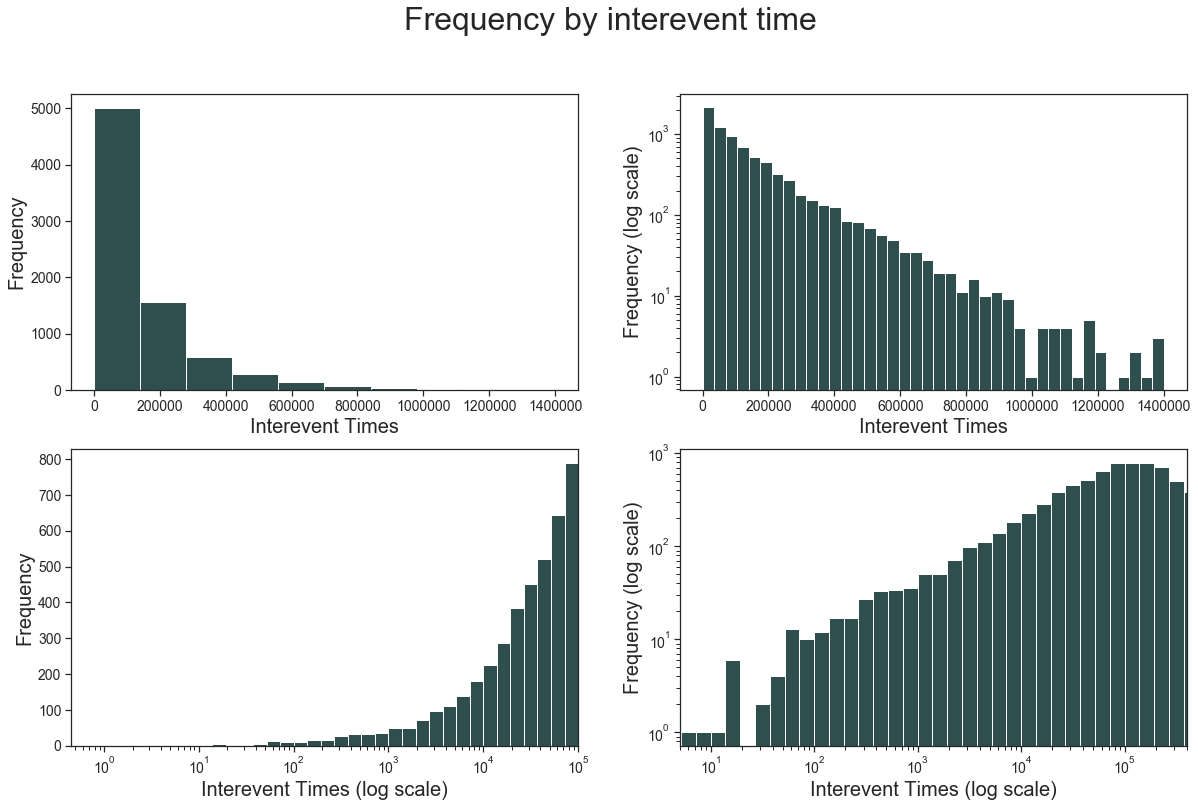

In [14]:
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('Frequency by interevent time',fontsize=32)
# Draw a nested boxplot 
bins = np.logspace(0,7,num=50)    
axes[0][0].hist(lis_diff,color='darkslategray')  
axes[1][0].hist(lis_diff,bins=bins,color='darkslategray')
axes[0][1].hist(lis_diff,bins=40,color='darkslategray')
axes[1][1].hist(lis_diff,bins=bins,color='darkslategray')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Interevent Times",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency",fontsize=20) #set font and title of y label
            ax.tick_params(labelsize=14) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Interevent Times (log scale)",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency",fontsize=20) #set font and title of y label
            ax.set_xscale('log')
            ax.tick_params(labelsize=14)
            ax.set_xlim([0, 100000])
        elif i == 0 and j==1:
            title = ax.set_xlabel("Interevent Times",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=20) #set font and title of y label
            ax.set_yscale('log')
            ax.tick_params(labelsize=14)

        elif i==1 and j == 1:
            title = ax.set_xlabel("Interevent Times (log scale)",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=20) #set font and title of y label
            ax.tick_params(labelsize=14)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xlim([5, 400000])
fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-frequency_logscale_united_Reasenberg.png",dpi=600)

In [16]:
a

,Longitude,Latitude,Time,Magnitude,Depth/Km,MagType,Diff_time
0,7.1740,46.1580,1985-01-04 16:57:40.240000,3.8,1.000000e+01,'M',0.000000e+00
1,6.6410,45.3380,1985-01-04 23:59:54.820000,3.7,5.000000e+00,'M',2.533458e+04
2,6.6270,45.4090,1985-01-05 03:47:03.640000,3.2,1.000000e+01,'M',3.896340e+04
3,16.7650,39.2910,1985-01-06 17:22:58.540000,3.0,5.000000e+00,'Md',1.743183e+05
4,12.7300,43.2250,1985-01-07 00:34:49.290000,3.0,1.000000e+01,'Md',2.002290e+05
...,...,...,...,...,...,...,...
7700,15.0510,37.7420,2020-03-22 10:32:11.000760,3.2,4.700000e+14,'Mw',1.111167e+09
7701,16.3558,38.5933,2020-03-23 20:19:34.770000,3.2,9.000000e+00,'ML',1.111289e+09
7702,13.3600,43.7922,2020-03-28 12:58:29.130000,3.2,1.010000e+14,'ML',1.111694e+09
7703,7.2853,44.9947,2020-03-29 07:11:34.350000,3.4,2.050000e+14,'ML',1.111760e+09


In [25]:
a=lis_diff
m=0
lis_diff2=[]
for i in a:
    m+=1
    if m>=0 and m < len(a):
        diff2=[a[m],a[m-1]]
        lis_diff2.append(diff2)
final1=[]
final2=[]
for i in lis_diff2:
    j=i[0]
    k=i[1]    
    final1.append(j)
    final2.append(k)

In [1]:
bins = np.logspace(0,9,num=50) 
plt.subplots(figsize=(10,6))
plt.hist2d(final1,final2,bins=bins,cmap=plt.cm.RdBu_r)
plt.xscale('log')
plt.yscale('log')
plt.title('Correlation between successive interevent times',fontsize=18,pad=15.0) 
plt.xlim([2, 10000000])
plt.ylim([2, 4000000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=18,labelpad=5) #set font and title of y label
plt.tick_params(labelsize=13)
plt.colorbar()
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents_hist2d_Reasenberg.png",dpi=600)

NameError: name 'np' is not defined

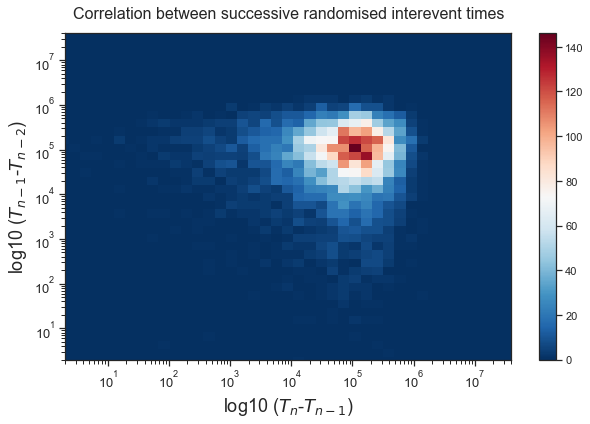

In [27]:
import random
m=0
random.shuffle(lis_diff)
lis_diff2_randomised=[]
for i in lis_diff:
    m+=1
    if m>=0 and m < len(lis_diff):
        diff2=[lis_diff[m],lis_diff[m-1]]
        lis_diff2_randomised.append(diff2)
final1_rand=[]
final2_rand=[]
for i in lis_diff2_randomised:
    j=i[0]
    k=i[1]    
    final1_rand.append(j)
    final2_rand.append(k)
bins = np.logspace(0,9,num=50) 
plt.subplots(figsize=(10,6))
plt.hist2d(final1_rand,final2_rand,bins,cmap=plt.cm.RdBu_r)
plt.xscale('log')
plt.yscale('log')
plt.title('Correlation between successive randomised interevent times',fontsize=16,pad=15.0) 
plt.xlim([2, 40000000])
plt.ylim([2, 40000000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=18,labelpad=5) #set font and title of y label
plt.tick_params(labelsize=13)
plt.colorbar()
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents_randomised_hist2d_Reasenberg.png",dpi=600)